# Algoritmos genéticos multiobjetivo

Algunas ocasiones es útil, o necesario, maximizar más de una función al mismo tiempo. Por ejemplo, se puede querer minimizar simultaneamente el tiempo de fabricación de una herramienta y también su costo.


![](https://img.remediosdigitales.com/be2cd2/optimo-de-pareto/1366_2000.jpg)

## 5.1 Manejo de restricciones 

Optimizar $f_i(x) (\forall i = 1,...,n)$

sujeto a $x \in X \subseteq  \mathbb{R}^n $, 

se trata de optimizar simultaneamente $n$ funciones, cuyas variables pueden estar sujetas a ciertas **restricciones**.








In [1]:
!pip install deap

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
# Definimos los pesos de los objetivos. (1.0,) significa maximización.
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Creamos una caja de herramientas para la configuración de la evolución
toolbox = base.Toolbox()

# Registro de funciones de atributo, individuo y población
toolbox.register("attr_float", random.uniform, -10, 10)  # cada atributo es un float en el rango [-10, 10]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registro de funciones de evolución
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selNSGA2)

# Definimos las funciones objetivo
def objective1(individual):
    return sum(x**2 for x in individual)

def objective2(individual):
    return sum((x-2)**2 for x in individual)

# Y las restricciones
def constraint(individual):
    # La suma de los valores del individuo debe ser menor o igual a 2
    if sum(individual) <= 2:
        return True,
    return False,



In [4]:
# toolbox.register("evaluate", objective1, objective2)
toolbox.register("evaluate", lambda ind: (objective1(ind), objective2(ind)))
toolbox.decorate("evaluate", tools.DeltaPenality(constraint, 100))  # imponemos una penalidazación si la restricción no se cumple

In [5]:
random.seed(64)

NGEN = 50
MU = 50
LAMBDA = 100
CXPB = 0.7
MUTPB = 0.3

pop = toolbox.population(n=MU)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                                         halloffame=hof)

gen	nevals	avg                        	std                      	min                      	max                        
0  	50    	[105.828426   119.80038591]	[53.10556747 72.05499406]	[10.69957037 10.02303486]	[259.04663085 354.28531971]
1  	100   	[161.54703601 191.8236222 ]	[37.44872511 60.18334104]	[104.74767374  84.73769134]	[265.05130234 354.28531971]
2  	100   	[216.42700373 257.98740852]	[28.7333707  61.03142418]	[176.21688143 110.88682202]	[282.32596706 388.50954056]
3  	100   	[251.9589021  297.91321197]	[19.38321091 66.15381724]	[213.21634334 137.31401823]	[286.35267644 400.38660423]
4  	100   	[271.87656455 336.43840654]	[10.6447528  44.45101227]	[256.54069041 251.00374746]	[293.37766155 411.92983466]
5  	100   	[284.52768648 343.42860931]	[ 5.8988934 42.5661508]  	[273.81535514 257.8280792 ]	[310.96786473 444.25216032]
6  	100   	[288.79061116 368.25950401]	[ 8.9479155  41.89785703]	[281.34909777 272.21257245]	[327.85686704 444.25216032]
7  	100   	[297.41083963 389.1763561

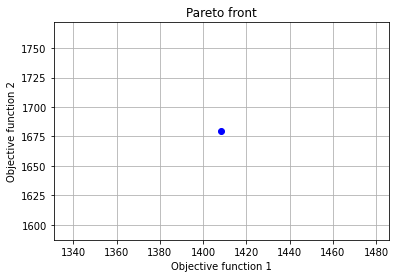

In [6]:
# Graficar el frente de Pareto
front = np.array([ind.fitness.values for ind in hof])
plt.scatter(front[:,0], front[:,1], c="b")
plt.axis("tight")
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.title('Pareto front')
plt.grid(True)
plt.show()


## Dos funciones que se comporten parecido

In [7]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
import matplotlib.pyplot as plt

# Definimos los pesos de los objetivos. (1.0,) significa maximización.
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Creamos una caja de herramientas para la configuración de la evolución
toolbox = base.Toolbox()

# Registro de funciones de atributo, individuo y población
toolbox.register("attr_float", random.uniform, -10, 10)  # cada atributo es un float en el rango [-10, 10]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registro de funciones de evolución
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selNSGA2)

# Definimos las funciones objetivo
def objective1(individual):
    return sum(x for x in individual) # maximizar la suma de los elementos

def objective2(individual):
    return len(individual) / sum((x+1) for x in individual)  # maximizar la inversa de la suma de los elementos incrementados

# Y las restricciones
def constraint(individual):
    # La suma de los valores del individuo debe ser menor o igual a 2
    if sum(individual) <= 2:
        return True,
    return False,

toolbox.register("evaluate", lambda ind: (objective1(ind), objective2(ind)))
toolbox.decorate("evaluate", tools.DeltaPenality(constraint, 100))  # imponemos una penalidad si la restricción no se cumple


random.seed(64)

NGEN = 50
MU = 50
LAMBDA = 100
CXPB = 0.7
MUTPB = 0.3

#################

logbook = tools.Logbook()

# En tu bucle evolutivo, guardarías las soluciones generadas en cada generación:
for gen in range(NGEN):
    offspring = algorithms.varAnd(pop, toolbox, CXPB, MUTPB)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    pop = toolbox.select(offspring, k=MU)
    logbook.record(gen=gen, pop=pop)  # Guardar la población de esta generación en el Logbook

# # Al final de la evolución, tendrías todas las soluciones generadas:
# all_solutions = np.array([ind.fitness.values for gen in logbook for ind in gen['pop']])


###############
pop = toolbox.population(n=MU)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                                             halloffame=hof)



/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg                    	std                      	min                        	max                      
0  	50    	[0.06700745 0.28322808]	[10.08409529  1.83638627]	[-22.98283576  -4.9497683 ]	[18.55853298  6.59094755]
1  	100   	[7.78946165 1.86030904]	[7.78667519 6.65001659]  	[-2.93647189  0.11928114]  	[22.15066598 47.22319123]
2  	100   	[9.37804834 3.10938656]	[9.80884138 9.30108482]  	[-2.93647189  0.09806883]  	[27.59075929 47.22319123]
3  	100   	[8.8653544  3.52576314]	[10.00878973  9.44096802]	[-2.93647189  0.09791766]  	[27.6379862  47.22319123]
4  	100   	[9.04852288 3.90707696]	[10.69391857  9.4928813 ]	[-2.93647189  0.09791766]  	[27.6379862  47.22319123]
5  	100   	[7.69971559 4.56641001]	[10.09926502  9.68633531]	[-2.93647189  0.09791766]  	[27.6379862  47.22319123]
6  	100   	[11.46955374  8.6217565 ]	[ 9.29344238 43.18379935]	[-2.99012017  0.09791766]  	[ 27.6379862  303.64888233]
7  	100   	[9.76266053 9.12529628]  	[ 9.55033651 43.15762662]	[-2.99012017 

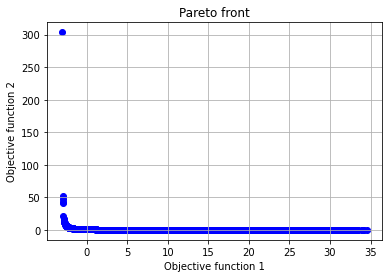

In [8]:
# Graficar el frente de Pareto
front = np.array([ind.fitness.values for ind in hof])
plt.scatter(front[:,0], front[:,1], c="b")
plt.axis("tight")
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.title('Pareto front')
plt.grid(True)
plt.show()

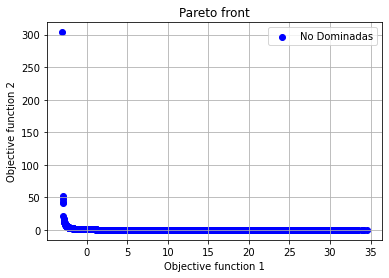

In [9]:
# Extraer todas las soluciones generadas
all_solutions = np.array([ind.fitness.values for ind in pop])

# Extraer las soluciones no dominantes (frente de Pareto)
non_dominated_solutions = np.array([ind.fitness.values for ind in hof])

# Extraer las soluciones dominantes
dominated_solutions = np.array([sol for sol in all_solutions if sol.tolist() not in non_dominated_solutions.tolist()])

# Graficar el frente de Pareto y las soluciones dominantes
plt.scatter(non_dominated_solutions[:,0], non_dominated_solutions[:,1], c="b", label='No Dominadas')
if dominated_solutions.size != 0:  # Solo graficar si hay soluciones dominadas
    plt.scatter(dominated_solutions[:,0], dominated_solutions[:,1], c="r", label='Dominadas')
plt.axis("tight")
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.title('Pareto front')
plt.grid(True)
plt.legend()
plt.show()


gen	nevals	avg                      	std                      	min                        	max                      
0  	50    	[-0.37965387 -0.28566163]	[11.97985537  1.20245745]	[-26.50831436  -6.69595595]	[21.46842212  1.31294196]
1  	50    	[-0.33407393  0.25769989]	[12.67147837  2.64899696]	[-26.50831436  -6.69595595]	[21.46842212 16.91510782]
2  	50    	[-0.34948588 -0.69746623]	[12.83807317  4.52817585]	[-23.45912389 -29.15347976]	[23.72986514 10.44782777]
3  	50    	[-0.38566468 -0.23137465]	[12.73128025  1.20476415]	[-21.78591812  -7.71965825]	[26.99843547  0.66518155]
4  	50    	[-0.27391837 -0.54755125]	[13.38543538  2.21275617]	[-24.40026285 -10.4089731 ]	[26.99843547  1.33040613]
5  	50    	[-0.24206171  1.07474774]	[13.72029371  8.13036622]	[-20.94788742  -2.99407655]	[26.95860594 57.76566477]
6  	50    	[-0.31561253 -0.02682066]	[13.92564843  0.70188662]	[-24.76600796  -2.90868776]	[28.17168747  1.64472536]
7  	50    	[-0.28873096 -0.03762174]	[14.10934769  0.69502375]	[

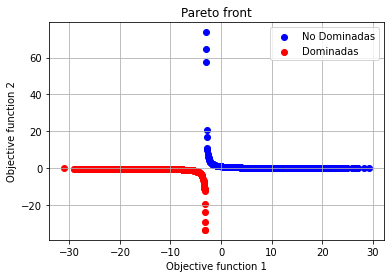

In [10]:
def main():
    random.seed(64)

    NGEN = 50
    MU = 50
    LAMBDA = 100
    CXPB = 0.7
    MUTPB = 0.3

    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Bucle evolutivo
    for gen in range(NGEN):
        offspring = algorithms.varAnd(pop, toolbox, CXPB, MUTPB)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=MU)
        hof.update(pop)
        record = stats.compile(pop) if stats else {}
        logbook.record(gen=gen, nevals=len(offspring), pop=pop, **record)  # Guardar la población completa
        print(logbook.stream)

    # Extraer todas las soluciones generadas
    all_solutions = np.array([ind.fitness.values for gen in logbook for ind in gen['pop']])

    # Extraer las soluciones no dominantes (frente de Pareto)
    non_dominated_solutions = np.array([ind.fitness.values for ind in hof])

    # Extraer las soluciones dominantes
    dominated_solutions = np.array([sol for sol in all_solutions if sol.tolist() not in non_dominated_solutions.tolist()])

    # Graficar el frente de Pareto y las soluciones dominantes
    plt.scatter(non_dominated_solutions[:,0], non_dominated_solutions[:,1], c="b", label='No Dominadas')
    if dominated_solutions.size != 0:  # Solo graficar si hay soluciones dominadas
        plt.scatter(dominated_solutions[:,0], dominated_solutions[:,1], c="r", label='Dominadas')
    plt.axis("tight")
    plt.xlabel('Objective function 1')
    plt.ylabel('Objective function 2')
    plt.title('Pareto front')
    plt.grid(True)
    plt.legend()
    plt.show()

    return pop, logbook, hof

if __name__ == "__main__":
    main()


### Ejercicio: Definir otras dos funciones objetivo y graficar su frente de Pareto.

## Ejemplo de https://github.com/Dany503/Algoritmos-Geneticos-en-Python-Un-Enfoque-Practico/tree/master/Cap4

### Problema de la suma de subconjuntos con múltiples objetivos

#### Descripción del problema:
Dado un conjunto de números enteros S y el entero c, el objetivo es encontrar el mínimo subconjunto de S, tal que la suma sea lo más cercana a c, sin excederse. Es decir:

$min\; c- \sum_{i=0}^{N-1}s_ix_i, \sum_{i=0}^{N-1}x_i $

sujeto a:

$\sum_{i=0}^{N-1}x_i \leq N$
y
$\sum_{i=0}^{N-1}s_ix_i \leq c$,


donde $s_i$ y $x_i$ son cada uno de los números del conunto S, así como una variable binaria que indica con 1 ($x_i=1$)si $s_i$ se incluye en el subconjunto y con cero en caso contrario ($x_i=0$).

Si se quisieran evaluar todas las combinaciones, se tendrían $2^n$, siendo $n$ el número de elementos en el conjunto original.

Los dos objetivos a satisfacer son:

1. *Número de elementos*: Minimizar el número de elementos que componen el subconjunto, de tal forma que los subconjuntos con menos elementos sean mejores.
2. *Diferencia*: Minimizar la diferencia con respecto al valor de c. Mientras menor la diferencia, mejor la solución. Si la suma sobrepasa c, se penalizará.

Se usará codificación binaria.

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt    
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

random.seed(42) 

# Límites de los valores del conjunto
LIMITE_INF, LIMITE_SUP = 0, 30
# Número de elementos del conjunto 
TAM_CONJUNTO = 30 
SUMA_OBJETIVO = 333
CONJUNTO = np.array(random.sample(range(LIMITE_INF, LIMITE_SUP), 
                                  TAM_CONJUNTO))

# Creamos los objetos para definir el problema y el tipo de individuo, 
# -1.0 significa que hay dos objetivos por minimizar
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0)) 
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Generación de individuos aleatorios
def crea_individuo(size):
    return [random.randint(0, 1) for i in range(size)]

# Generación de individuos y población inicial    
toolbox.register("attr", crea_individuo, TAM_CONJUNTO)
toolbox.register("individual", tools.initIterate, creator.Individual, 
                 toolbox.attr)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)
CONJUNTO

array([20,  3,  0, 23,  8,  7, 24,  4, 28, 17,  2, 18, 13,  1, 27, 16, 21,
       29, 25,  9, 15, 11, 12,  5,  6, 22, 26, 10, 14, 19])

In [12]:
# Función objetivo
def funcion_objetivo(individuo, suma_objetivo):
    """
    Función objetivo para el problema de la suma de subconjutos
    Entrada: Recibe como entrada el individuo y la suma objetivo 
    que se tiene que satisfacer con la suma de los elementos del subconjuto.
    Salida: Como objetivo 1 se devuelve el número de elementos del
    subconjunto. Como objetivo 2 se devuelve la diferencia con respecto
    a la suma objetivo.
    """
    subconjunto = CONJUNTO[np.array(individuo) == 1]
    suma_subconjunto = np.sum(subconjunto)
    diferencia = suma_objetivo - suma_subconjunto
    n_elementos = sum(individuo)
    if diferencia < 0: # nos pasamos
        return 10000, 10000 # pena de muerte    
    if n_elementos == 0: # no se selecciona ninguna elemento
        return 10000, 10000
    return n_elementos, diferencia

# Registro de operadores genéticos y función objetivo
toolbox.register("mate", tools.cxTwoPoint) 
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05) 
toolbox.register("select", tools.selNSGA2) 
toolbox.register("evaluate", funcion_objetivo, suma_objetivo=SUMA_OBJETIVO) 


In [13]:
def plot_frente():
    """
    Representación del frente de Pareto que hemos obtenido
    """
    datos_pareto = np.loadtxt("fitnessconjuntos.txt", delimiter=",")    
    plt.scatter(datos_pareto[:, 0], datos_pareto[:, 1], marker="+", 
                color="b", s=50)    
    plt.xlabel("Elementos")
    plt.ylabel("Diferencias")
    plt.grid(True)
    plt.xlim([0, 17])
    plt.ylim([-20, 300])
    plt.legend(["Frente de Pareto"], loc="upper right")
#     plt.savefig("Pareto_conjunto.eps", dpi = 300)

In [14]:
def main():
    CXPB, MUTPB, NGEN = 0.7, 0.3, 200
    MU, LAMBDA = 300, 300
    pop = toolbox.population(MU)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()  
    pareto = tools.ParetoFront() 
    pop, logbook = algorithms.eaMuPlusLambda(pop , toolbox , mu=MU, 
                                             lambda_=LAMBDA, cxpb=CXPB,  
                                             mutpb=MUTPB, ngen=NGEN, 
                                             stats=stats, halloffame=pareto, 
                                             verbose=False)
    return pop, logbook, pareto


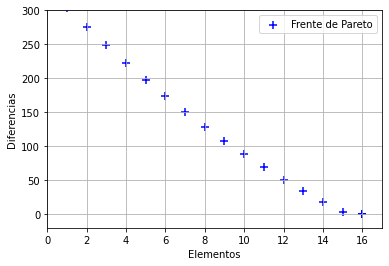

In [15]:
if __name__ == "__main__":    
    pop, log, pareto = main()
    res_individuos = open("individuosconjuntos.txt", "w")
    res_fitness = open("fitnessconjuntos.txt", "w")
    for ind in pareto:
        res_individuos.write(str(ind))
        res_individuos.write("\n")
        res_fitness.write(str(ind.fitness.values[0]))
        res_fitness.write(",")
        res_fitness.write(str(ind.fitness.values[1]))
        res_fitness.write("\n")
    res_fitness.close()
    res_individuos.close()
plot_frente()

## Ejercicio: Modificar parámetros y graficar diferentes frentes de Pareto. Anotar observaciones.


## Practica: Cambiar las dos funciones objetivo. 